# CO2-Emissions-Forecasting-of-India-using-LSTM-Networks

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
# Specify file location

dataframe_CO2Emissions = pd.read_csv('CO2_Emissions_India.csv')
dataframe_CO2Emissions.head()

,Year,CO2 emissions
0,1960,0.267634
1,1961,0.283704
2,1962,0.305851
3,1963,0.321795
4,1964,0.308169


In [3]:
dataframe_CO2Emissions.tail()

,Year,CO2 emissions
54,2014,1.649328
55,2015,1.641198
56,2016,1.648359
57,2017,1.719190
58,2018,1.799825


In [4]:
dataframe_CO2Emissions.shape

(59, 2)

In [5]:
# Analyse the CO2_Emission dataset for any NaN or Null values

print(dataframe_CO2Emissions.isnull().sum())
print(dataframe_CO2Emissions.info())

Year             0
CO2 emissions    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           59 non-null     int64  
 1   CO2 emissions  59 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB
None


In [6]:
# Filter the target column from dataset and convert the dataframe to numpy

target = dataframe_CO2Emissions.iloc[:, 1:2].values

In [7]:
print(target.shape)

(59, 1)


## Data Preprocessing

In [8]:
# Feature scaling 

scaler = MinMaxScaler(feature_range=(0,1))
training_scaled_data = scaler.fit_transform(target)
training_scaled_data.shape

(59, 1)

In [9]:
# Fix the random number seed  so that our results are reproducible.

np.random.seed()

In [10]:
# Data from 1960-2019: We will split the data into 80% training set and 20% validation set.

training_set = int(len(target)* 0.8)
training_set

47

In [11]:
# Filter the scaled train dataset

train_data = training_scaled_data[0:training_set , : ]

In [12]:
train_data.shape

(47, 1)

In [13]:
test_data = training_scaled_data[training_set: , : ]

In [14]:
test_data.shape

(12, 1)

In [15]:
# Train the dataset in the cycle of 4 years, so 1960-1963; 1961-1964 and so on.

X_train = []
y_train = []
memory_range = 4
for i in range(memory_range, len(train_data)):
    X_train.append(train_data[i-memory_range:i, 0])
    y_train.append(train_data[i, 0])

    
# Converting into numpy sequences to train the LSTM model

X_train, y_train = np.array(X_train), np.array(y_train) 

In [16]:
# Reshape the training data to 3 dimensional for LSTM input.

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)

In [17]:
X_train.shape

(43, 4, 1)

In [18]:
y_train.shape

(43,)

## Building the LSTM Model

In [84]:
model = Sequential()

# We use dropout to avoid over-fitting.

#Adding the first LSTM layer with 10% dropout regularisation
model.add(LSTM(100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer
model.add(LSTM(units = 95, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer
model.add(LSTM(units = 90))
model.add(Dropout(0.2))

# Adding a fifth LSTM layer
model.add(LSTM(units = 90))
model.add(Dropout(0.2))

# Adding a sixth LSTM layer
model.add(LSTM(units = 80))
model.add(Dropout(0.1))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train,y_train, epochs = 90, batch_size = 64, validation_split=0.2)

Epoch 1/90
1/1 [==============================] - 11s 11s/step - loss: 0.0344 - val_loss: 0.1788
Epoch 2/90
1/1 [==============================] - 0s 54ms/step - loss: 0.0325 - val_loss: 0.1732
Epoch 3/90
1/1 [==============================] - 0s 55ms/step - loss: 0.0305 - val_loss: 0.1675
Epoch 4/90
1/1 [==============================] - 0s 55ms/step - loss: 0.0289 - val_loss: 0.1617
Epoch 5/90
1/1 [==============================] - 0s 56ms/step - loss: 0.0271 - val_loss: 0.1557
Epoch 6/90
1/1 [==============================] - 0s 58ms/step - loss: 0.0252 - val_loss: 0.1496
Epoch 7/90
1/1 [==============================] - 0s 59ms/step - loss: 0.0240 - val_loss: 0.1433
Epoch 8/90
1/1 [==============================] - 0s 54ms/step - loss: 0.0217 - val_loss: 0.1368
Epoch 9/90
1/1 [==============================] - 0s 57ms/step - loss: 0.0199 - val_loss: 0.1301
Epoch 10/90
1/1 [==============================] - 0s 58ms/step - loss: 0.0187 - val_loss: 0.1231
Epoch 11/90
1/1 [============

Epoch 84/90
1/1 [==============================] - 0s 59ms/step - loss: 0.0012 - val_loss: 5.0294e-04
Epoch 85/90
1/1 [==============================] - 0s 54ms/step - loss: 9.5007e-04 - val_loss: 5.6694e-04
Epoch 86/90
1/1 [==============================] - 0s 50ms/step - loss: 0.0010 - val_loss: 4.3871e-04
Epoch 87/90
1/1 [==============================] - 0s 54ms/step - loss: 9.7332e-04 - val_loss: 3.1743e-04
Epoch 88/90
1/1 [==============================] - 0s 53ms/step - loss: 0.0011 - val_loss: 2.6578e-04
Epoch 89/90
1/1 [==============================] - 0s 52ms/step - loss: 9.2773e-04 - val_loss: 2.6239e-04
Epoch 90/90
1/1 [==============================] - 0s 59ms/step - loss: 7.8605e-04 - val_loss: 2.6612e-04


In [85]:
# Construct the metrics for the LSTM model

metrics = pd.DataFrame(model.history.history)

In [86]:
metrics.head()

,loss,val_loss
0,0.034432,0.178799
1,0.032549,0.173165
2,0.030463,0.167468
3,0.028897,0.161666
4,0.027115,0.155720


Text(0, 0.5, 'Loss')

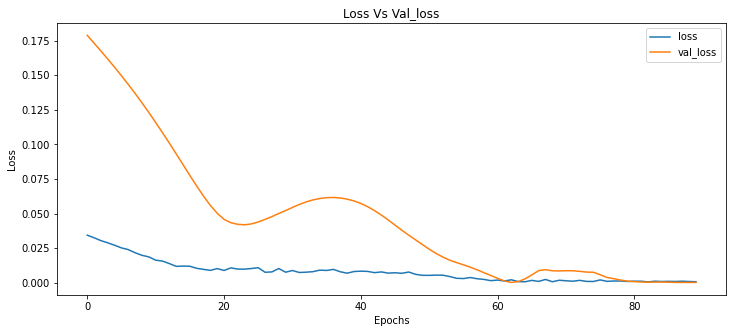

In [87]:
# Plot the loss of LSTM model 

metrics[['loss','val_loss']].plot(figsize=(12, 5))
plt.title("Loss Vs Val_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [105]:
# Prepare the test data for validation

test_data = training_scaled_data[training_set - memory_range: , : ]

#Create the x_test and y_test data sets

X_test = []
y_test =  target[training_set : , : ]
for i in range(memory_range, len(test_data)):
    X_test.append(test_data[i-memory_range:i,0])

# Convert x_test to a numpy array

X_test = np.array(X_test)

In [106]:
# Reshape the test data to 3 dimensional shape accepted by the LSTM

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [107]:
X_test.shape

(12, 4, 1)

In [108]:
X_test

array([[[0.42183238],
        [0.45346921],
        [0.47237275],
        [0.50529306]],

       [[0.45346921],
        [0.47237275],
        [0.50529306],
        [0.56232053]],

       [[0.47237275],
        [0.50529306],
        [0.56232053],
        [0.59931851]],

       [[0.50529306],
        [0.56232053],
        [0.59931851],
        [0.66600485]],

       [[0.56232053],
        [0.59931851],
        [0.66600485],
        [0.70590422]],

       [[0.59931851],
        [0.66600485],
        [0.70590422],
        [0.74447717]],

       [[0.66600485],
        [0.70590422],
        [0.74447717],
        [0.80942035]],

       [[0.70590422],
        [0.74447717],
        [0.80942035],
        [0.82752454]],

       [[0.74447717],
        [0.80942035],
        [0.82752454],
        [0.90177602]],

       [[0.80942035],
        [0.82752454],
        [0.90177602],
        [0.89647046]],

       [[0.82752454],
        [0.90177602],
        [0.89647046],
        [0.90114394]],

       [[0

In [109]:
y_test.shape

(12, 1)

In [110]:
# Prediction with the prepared LSTM model

predicted_CO2 = model.predict(X_test)

# Inverse scaling of predicted values to original scale

predicted_CO2 = scaler.inverse_transform(predicted_CO2)

In [111]:
predicted_CO2

array([[1.0324795],
       [1.0843256],
       [1.1343427],
       [1.2061706],
       [1.292776 ],
       [1.3665297],
       [1.4513861],
       [1.5119381],
       [1.5738515],
       [1.6404002],
       [1.6797453],
       [1.7322289]], dtype=float32)

In [112]:
y_test.shape

(12, 1)

## Test Accuracy of LSTM Model 

In [113]:
# Determine the Mean Absoulute Error

m = mean_absolute_error(y_test,predicted_CO2)
print("The Mean Absoulte Error is:", m*100)

The Mean Absoulte Error is: 9.632002050009666


In [117]:
# Determine the Root Mean Absoulute Error

from math import sqrt
a = sqrt(mean_squared_error(y_test,predicted_CO2))
print("Root Mean Absoulute Error is:", a*100)

Root Mean Absoulute Error is: 10.558225470372857


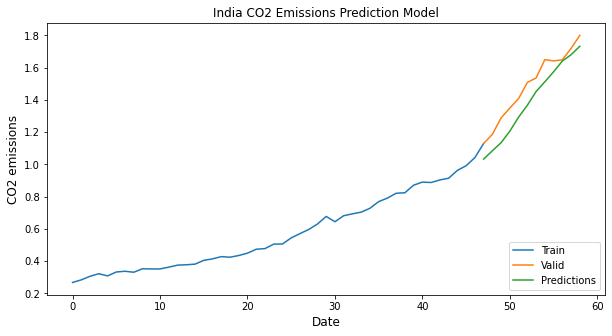

In [118]:
# Plot the train, predicted and validated data set

train = dataframe_CO2Emissions[:training_set+1]
valid = dataframe_CO2Emissions[training_set:]
valid['Predictions'] = predicted_CO2
plt.figure(figsize=(10,5))
plt.title('India CO2 Emissions Prediction Model')
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO2 emissions', fontsize=12)
plt.plot(train['CO2 emissions'])
plt.plot(valid[['CO2 emissions', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [119]:
valid

,Year,CO2 emissions,Predictions
47,2007,1.129217,1.032480
48,2008,1.185905,1.084326
49,2009,1.288081,1.134343
50,2010,1.349214,1.206171
51,2011,1.408316,1.292776
52,2012,1.507821,1.366530
53,2013,1.535560,1.451386
54,2014,1.649328,1.511938
55,2015,1.641198,1.573851
56,2016,1.648359,1.640400


## Forecasting CO2 Emissions 

In [120]:
# Forecasting CO2 Emissions over the entire data set with the LSTM Model

dataframe_CO2Emissionstest = pd.read_csv('CO2_Emissions_India.csv')

In [121]:
# We will use the cycle of 4 years, so will add initial 4 years to prevent data truncation

test_datafadd = dataframe_CO2Emissionstest.head(4)
test_datafadd = pd.concat([test_datafadd, dataframe_CO2Emissionstest])

In [122]:
# Feature scaling of dataset

targetf = test_datafadd.iloc[:, 1:2].values
test_scaled_data = scaler.fit_transform(targetf)
test_scaled_data.shape

(63, 1)

In [123]:
test_dataf = test_scaled_data[: , : ]

In [124]:
# Prepare the test data for forecasting

full_model = test_scaled_data[: , : ]

#Create the x_test and y_test data sets

Xf_test = []
yf_test =  target[: , : ]

for i in range(memory_range, len(test_dataf)):
    Xf_test.append(test_dataf[i-memory_range:i,0])

# Convert x_test to a numpy array

Xf_test = np.array(Xf_test)

#Reshape the data into the shape accepted by the LSTM

Xf_test = Xf_test.reshape(Xf_test.shape[0],Xf_test.shape[1] , 1)
print('Number of rows and columns: ', Xf_test.shape)

Number of rows and columns:  (59, 4, 1)


In [125]:
Xf_test.shape

(59, 4, 1)

In [126]:
Xf_test.shape

(59, 4, 1)

In [127]:
yf_test.shape

(59, 1)

In [128]:
# Prediction of entire dataset using LSTM model

predicted_CO2f = model.predict(Xf_test)
predicted_CO2f = scaler.inverse_transform(predicted_CO2f)

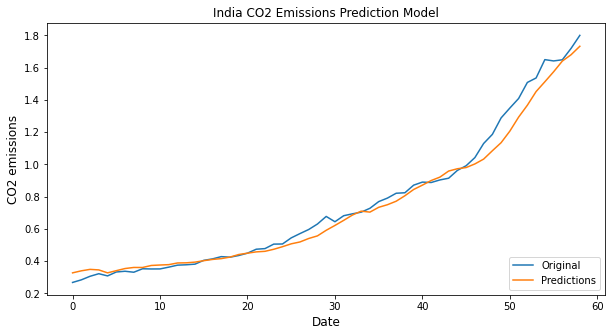

In [129]:
# Plot the original and predicted CO2 emissions set

pd.options.mode.chained_assignment = None 
train = dataframe_CO2Emissions[:]
valid = dataframe_CO2Emissions[:]
valid['Predictions'] = predicted_CO2f
plt.figure(figsize=(10,5))
plt.title('India CO2 Emissions Prediction Model')
plt.xlabel('Date', fontsize=12)
plt.ylabel('CO2 emissions', fontsize=12)
plt.plot(train['CO2 emissions'])
plt.plot(valid[['Predictions']])
plt.legend(['Original', 'Predictions'], loc='lower right')
plt.show()

In [130]:
predicted_CO2f.shape

(59, 1)

In [146]:
# Accuracy for the entire data set by predicted model

q = sqrt(mean_squared_error(yf_test,predicted_CO2f))
print("Root Mean Absoulute Error is:", q*100)

Root Mean Absoulute Error is: 5.5433407747519166


In [147]:
valid.tail(4)

,Year,CO2 emissions,Predictions
55,2015,1.641198,1.573851
56,2016,1.648359,1.640400
57,2017,1.719190,1.679745
58,2018,1.799825,1.732229


## Forecasting the Future CO2 Emissions

In [148]:
target2 = target

In [149]:
# Feature scaling

target2 = scaler.fit_transform(target2)

In [150]:
# Reshape the dataset to used for input in loop

target2 = target2.reshape((-1))
target2.shape

(59,)

In [171]:
# Create a loop for LSTM model input

# Here, the new data generated will be used as input for next year forecast

# Memory_range is the input years for forecasting

memory_range = 4
def predict(num_prediction, model):
    prediction_list = target2[-memory_range:]
    
    for i in range(num_prediction):
        x = prediction_list[-memory_range:]
        x = x.reshape((1, memory_range, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[memory_range-1:]
        
    return prediction_list


# For 4 years of future CO2 prediction

num_prediction = 4
forecast = predict(num_prediction, model)

In [172]:
#prediction_list = target2[-memory_range:]
#prediction_list

In [173]:
# Predicted scaled CO2 emissions of future 4 years

forecast

array([1.        , 0.9588573 , 0.97407413, 1.00212991, 1.01749873])

In [174]:
forecast.shape

(5,)

In [175]:
# Reshape the forecast for inverse scaling to original values

forecast = forecast.reshape(forecast.shape[0], 1)
forecast.shape

(5, 1)

In [176]:
forecast = scaler.inverse_transform(forecast)

## Future CO2 Emissions

In [177]:
# The future CO2 Emissions for 2019, 2020, 2021, 2022 respectively. 

forecast

array([[1.79982545],
       [1.73678696],
       [1.76010205],
       [1.80308888],
       [1.82663685]])

In [178]:
# Add to the previous predicted dataset

add = np.append(predicted_CO2f, forecast)

In [179]:
add.shape

(64,)

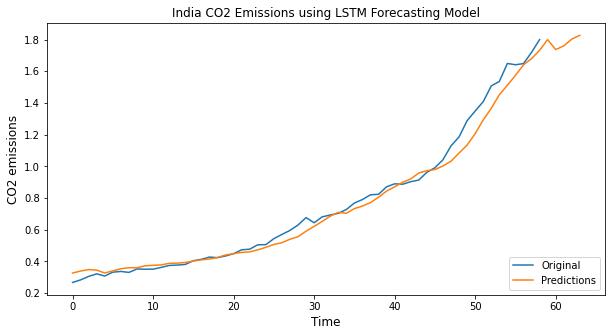

In [180]:
# Plot the original and LSTM forecasting CO2 emissions

plt.figure(figsize=(10,5))
plt.title('India CO2 Emissions using LSTM Forecasting Model')
plt.plot(train['CO2 emissions'])
plt.plot(add)
plt.xlabel('Time', fontsize=12)
plt.ylabel('CO2 emissions', fontsize=12)
plt.legend(['Original', 'Predictions'], loc='lower right')